In [4]:
import pandas as pd
import networkx as nx 
import altair as alt
import nx_altair as nxa

# opening the data 

In [5]:
PATH = "collecting_data_with_SPARQL/graph_to_queer_people_dist1.csv"
df = pd.read_csv(PATH)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176356 entries, 0 to 176355
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   subject    176356 non-null  object 
 1   predicate  176356 non-null  object 
 2   object     176356 non-null  object 
 3   context    0 non-null       float64
dtypes: float64(1), object(3)
memory usage: 5.4+ MB


# Using networkx to print the graph

In [7]:
df2 = df[:100]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    100 non-null    object 
 1   predicate  100 non-null    object 
 2   object     100 non-null    object 
 3   context    0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


In [8]:
nxgraph = nx.from_pandas_edgelist(df2, "subject", "object", edge_attr="predicate")

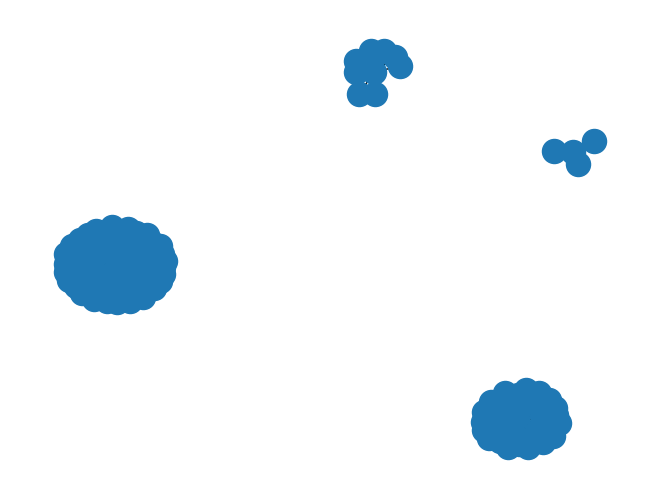

In [9]:
nx.draw(nxgraph)

### adding some color

In [18]:
for node in nxgraph.nodes():
    print(node)

https://fr.wikipedia.org/wiki/Fran%C3%A7ois_Portzer
http://www.wikidata.org/entity/Q3085601
http://www.wikidata.org/entity/statement/Q15075310-8a79737c-4d52-525f-8321-476548c73d27
http://www.wikidata.org/entity/Q15075310
http://www.wikidata.org/entity/Q4618060
http://www.wikidata.org/entity/Q18724
http://www.wikidata.org/entity/Q13577140
http://www.wikidata.org/entity/Q17141
http://www.wikidata.org/entity/Q201687
http://www.wikidata.org/entity/statement/Q201687-D22E52E6-416B-49D1-90B9-A9798948928F
http://www.wikidata.org/entity/statement/Q115906303-612AED31-C962-41C2-A987-A550A9BB74CD
http://www.wikidata.org/entity/statement/Q115906612-72E36060-6D13-4333-9C43-C32124C8F5C3
http://www.wikidata.org/entity/statement/Q115906967-C0E75E8A-6911-4AEF-BF75-4B4CDE88135C
http://www.wikidata.org/entity/Q626235
http://www.wikidata.org/entity/statement/Q103871363-ED27C857-90A6-4086-A744-30B1C66B10F5
http://www.wikidata.org/entity/Q63526872
http://www.wikidata.org/entity/Q108298120
http://www.wikidata

In [28]:
df2["subject"][0] in df2["subject"].unique()

True

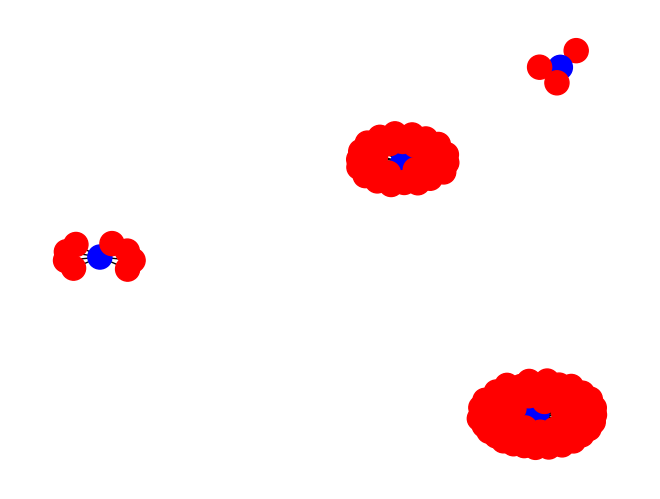

In [30]:
color_map = []
unique_subjects = df2["subject"].unique()
for node in nxgraph : 
    if node in unique_subjects:
        color_map.append('red')
    else :
        color_map.append("blue")
nx.draw(nxgraph, node_color=color_map)

explication: en fait c'est le truc en relation inverse d'où le centre

In [52]:
def is_wikidata(iri):
    caract = "http://www.wikidata.org/"
    taille = len(caract)
    return iri[:taille] == caract

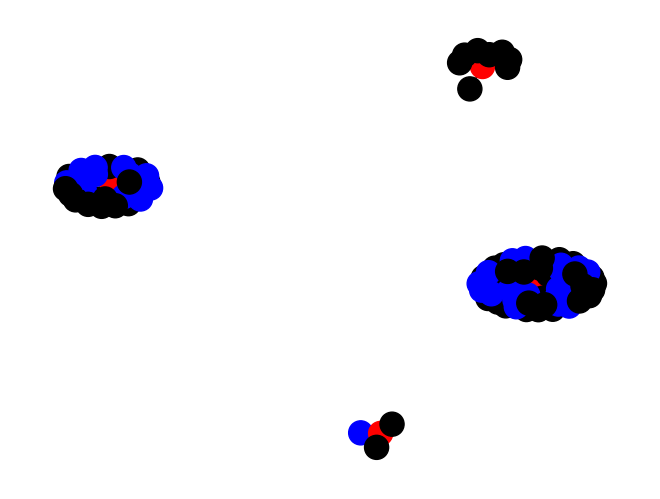

In [55]:
nxgraph = nx.from_pandas_edgelist(df2, "subject", "object", edge_attr="predicate")
color_map = []
unique_subjects = df2["subject"].unique()
for node in nxgraph.nodes() : 
    if not node in unique_subjects:
        color_map.append('red')
    elif is_wikidata(node):
        color_map.append("black")
    else:
        color_map.append("blue")
nx.draw(nxgraph, node_color=color_map)

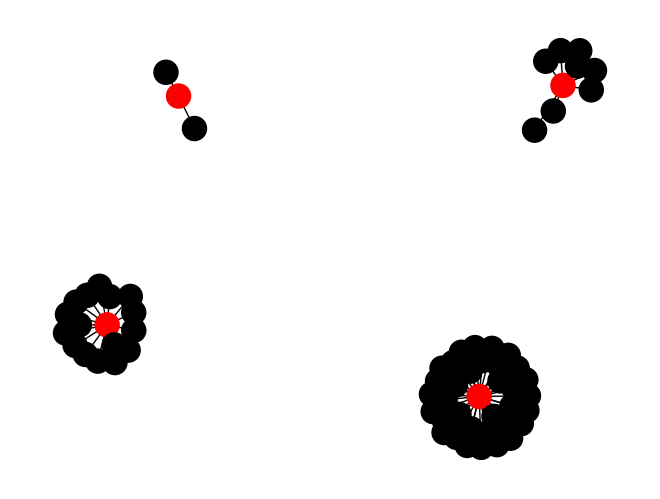

In [57]:
nxgraph = nx.from_pandas_edgelist(df2, "subject", "object", edge_attr="predicate")
color_map = []
unique_subjects = df2["subject"].unique()
nodes_to_remove = []
for node in nxgraph.nodes() : 
    if not node in unique_subjects:
        color_map.append('red')
    elif is_wikidata(node):
how to not print a node networkx        color_map.append("black")
    else:
        nodes_to_remove.append(node)
nxgraph.remove_nodes_from(nodes_to_remove)
nx.draw(nxgraph, node_color=color_map)

# Using altair
https://github.com/Zsailer/nx_altair 

In [10]:
pos = nx.spring_layout(nxgraph)
nxa.draw_networkx(nxgraph, pos)

alt.LayerChart(...)

In [11]:
nxa.draw_networkx(
    G=nxgraph,
    pos=pos
).interactive()


alt.LayerChart(...)

In [15]:
chart = nxa.draw_networkx(
    G=nxgraph,
    pos=pos,
    node_size=80,
    node_color='viable',
    cmap='viridis',
    #width='weight',
    node_tooltip=['name']
)



In [16]:
chart.interactive()

ValueError: viable encoding field is specified without a type; the type cannot be inferred because it does not match any column in the data.

alt.LayerChart(...)

Other ideas : mpld3
https://stackoverflow.com/questions/33988130/interactive-labels-on-nodes-using-python-and-networkx
